In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

**Convutional Operation using 1_Stride**

In [2]:
img = np.arange(49).reshape(7, 7)
kernel = np.arange(9).reshape(3,3)
print(f'img = {img} \n kernel = {kernel}')

img = [[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]] 
 kernel = [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [3]:
output_image  = np.zeros_like(img)

output_image[1,1] = np.sum(img[0:3, 0:3] * kernel)
output_image[1,2] = np.sum(img[0:3, 1:4] * kernel)
output_image[1,3] = np.sum(img[0:3, 2:5] * kernel)
output_image

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0, 420, 456, 492,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

**Resulting img without padding**

In [4]:
filter_image  = np.zeros_like(img)
for i in range(1, img.shape[0]-1):
     for j in range(1,img.shape[1]-1):
         local  = img[i-1 : i+2  , j-1:j+2]
         product = local * kernel
         filter_image[i,j] = np.sum(product)
filter_image

array([[   0,    0,    0,    0,    0,    0,    0],
       [   0,  420,  456,  492,  528,  564,    0],
       [   0,  672,  708,  744,  780,  816,    0],
       [   0,  924,  960,  996, 1032, 1068,    0],
       [   0, 1176, 1212, 1248, 1284, 1320,    0],
       [   0, 1428, 1464, 1500, 1536, 1572,    0],
       [   0,    0,    0,    0,    0,    0,    0]])

***Add Padding to Original Image***

In [5]:
r,c = img.shape
pad_image =  np.zeros((r+2 , c+2))
pad_image[1:-1 , 1: -1] = img
pad_image

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  0.],
       [ 0.,  7.,  8.,  9., 10., 11., 12., 13.,  0.],
       [ 0., 14., 15., 16., 17., 18., 19., 20.,  0.],
       [ 0., 21., 22., 23., 24., 25., 26., 27.,  0.],
       [ 0., 28., 29., 30., 31., 32., 33., 34.,  0.],
       [ 0., 35., 36., 37., 38., 39., 40., 41.,  0.],
       [ 0., 42., 43., 44., 45., 46., 47., 48.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

**The Resultant img 7x7**

In [6]:
for i in range( img.shape[0]):
    for j in range(img.shape[1]):
        filter_image[i,j] =np.sum(pad_image[i:i+3 , j:j+3] * kernel)

filter_image

array([[ 118,  184,  217,  250,  283,  316,  202],
       [ 288,  420,  456,  492,  528,  564,  348],
       [ 477,  672,  708,  744,  780,  816,  495],
       [ 666,  924,  960,  996, 1032, 1068,  642],
       [ 855, 1176, 1212, 1248, 1284, 1320,  789],
       [1044, 1428, 1464, 1500, 1536, 1572,  936],
       [ 490,  628,  643,  658,  673,  688,  374]])

**Convutional Operation on RGB(Color Img)**

In [7]:
import numpy as np

# Step 1: Create a 6x6x3 image with random values (representing RGB channels)
image = np.random.randint(0, 256, (6, 6, 3))  # Random pixel values between 0 and 255
print("Input Image (6x6x3):")
print(image)

# Step 2: Define 3x3x3 filters (vertical and horizontal)
vertical_filter = np.array([
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
])

horizontal_filter = np.array([
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
])

# Step 3: Define a function to perform convolution
def convolve(image, filter):
    H, W, C = image.shape  # Height, Width, Channels
    FH, FW, FC = filter.shape  # Filter dimensions (must match input channels)
    output_height = H - FH + 1
    output_width = W - FW + 1
    output = np.zeros((output_height, output_width))  # Resulting feature map

    # Sliding window over the image
    for i in range(output_height):
        for j in range(output_width):
            # Extract a 3x3x3 patch
            patch = image[i:i+FH, j:j+FW, :]
            # Compute element-wise multiplication and sum the result
            output[i, j] = np.sum(patch * filter)

    return output

# Step 4: Perform convolution with both filters
vertical_output = convolve(image, vertical_filter)
horizontal_output = convolve(image, horizontal_filter)

print("\nVertical Filter Output (Feature Map):")
print(vertical_output)

print("\nHorizontal Filter Output (Feature Map):")
print(horizontal_output)


Input Image (6x6x3):
[[[200  15   1]
  [ 61 171  17]
  [251 145 215]
  [125 172 220]
  [ 51 115 175]
  [102 172 194]]

 [[127  66 231]
  [ 18  67 211]
  [ 47 231  16]
  [ 22  87  15]
  [ 71  80  86]
  [ 42 159 109]]

 [[ 31 209 208]
  [108 158 129]
  [219  91 163]
  [188 193 134]
  [ 46 165 229]
  [116  25 248]]

 [[180 148  50]
  [ 13 140  54]
  [163 102 168]
  [ 98 218 231]
  [ 15 178 243]
  [136 246  44]]

 [[232 224  10]
  [197  84 190]
  [177 197  99]
  [ 27 156  37]
  [ 73   7 216]
  [ 95  31   2]]

 [[149 194  37]
  [ 64 236  20]
  [ 10  18 102]
  [166  59 164]
  [207  30  82]
  [ 18 122 247]]]

Vertical Filter Output (Feature Map):
[[ 129.   81.  233.  647.]
 [ 324.  245.  416.  605.]
 [-249.   15.  514.  590.]
 [-455.  150.  406.  431.]]

Horizontal Filter Output (Feature Map):
[[-290. -216.  360.  -11.]
 [  50. -288.   87.   61.]
 [ -87. -209.  207.  339.]
 [ 188. -158.  -15.  215.]]


**The Multiple(2_filters) Filters are apply to RGB img creates 4x4x2)**

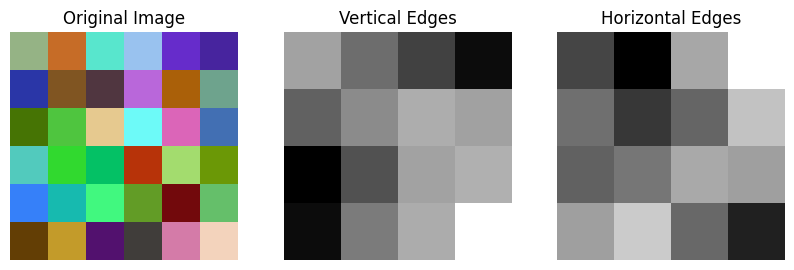

Output shape: (4, 4, 2)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 6x6x3 image with random values
image = np.random.rand(6, 6, 3)  # Random RGB image

# Define two 3x3x3 filters
# Vertical edge detection filter
filter_vertical = np.array([
    [[1, 0, -1], [1, 0, -1], [1, 0, -1]],  # Red channel
    [[1, 0, -1], [1, 0, -1], [1, 0, -1]],  # Green channel
    [[1, 0, -1], [1, 0, -1], [1, 0, -1]]   # Blue channel
])

# Horizontal edge detection filter
filter_horizontal = np.array([
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],  # Red channel
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],  # Green channel
    [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]   # Blue channel
])

# Convolution function
def convolve(image, kernel):
    h, w, c = image.shape
    kh, kw, kc = kernel.shape
    assert c == kc, "The filter depth must match the image depth."

    # Calculate the output size
    output_h = h - kh + 1
    output_w = w - kw + 1
    output = np.zeros((output_h, output_w))

    # Perform convolution
    for i in range(output_h):
        for j in range(output_w):
            region = image[i:i+kh, j:j+kw, :]
            output[i, j] = np.sum(region * kernel)
    return output

# Apply the filters to the image
output_vertical = convolve(image, filter_vertical)
output_horizontal = convolve(image, filter_horizontal)

# Combine the outputs into a single output with 2 channels
output_combined = np.stack((output_vertical, output_horizontal), axis=-1)

# Display the results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Vertical edge detection output
plt.subplot(1, 3, 2)
plt.imshow(output_vertical, cmap='gray')
plt.title("Vertical Edges")
plt.axis('off')

# Horizontal edge detection output
plt.subplot(1, 3, 3)
plt.imshow(output_horizontal, cmap='gray')
plt.title("Horizontal Edges")
plt.axis('off')


plt.show()

# Output dimensions
print("Output shape:", output_combined.shape)  # Should be (4, 4, 2)
